In [1]:
import numpy as np
import imageio
from PIL import Image
from IPython.display import Image as IPImage, display

In [2]:
data = np.load('/home/yl/dppo/data/robomimic/square-ph/train.npz', allow_pickle=True)
for k, v in data.items():
    print(k, v.shape)

states (30154, 23)
actions (30154, 7)
rewards (30154,)
traj_lengths (200,)


In [5]:
states = data["states"]
np.max(states, axis=0), np.min(states, axis=0)

(array([0.99999591, 0.99999445, 0.99999816, 0.999998  , 0.99999866,
        0.99999365, 0.99999207, 0.99995371, 0.98112514, 0.9999951 ,
        0.9999919 , 0.99999813, 0.99999721, 0.99999732, 0.999999  ,
        0.999999  , 0.9999933 , 0.99999541, 0.9999926 , 0.999999  ,
        0.999999  , 0.99999631, 0.99999736]),
 array([-1.        , -1.        ,  0.52313754,  0.32385911, -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -0.65316219,  0.53536837, -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -0.99999979]))

In [68]:
data = np.load('/home/yl/dppo/data/robomimic/square-img-ph/train.npz', allow_pickle=True)
for k, v in data.items():
    try:
        print(k, v.shape, type(v))
    except:
        print(k)


states (28597, 9) <class 'numpy.ndarray'>
actions (28597, 7) <class 'numpy.ndarray'>
rewards (28597,) <class 'numpy.ndarray'>
traj_lengths (190,) <class 'numpy.ndarray'>
images (28597, 3, 96, 96) <class 'numpy.ndarray'>


In [66]:
data["traj_lengths"]

array([127, 123, 124, 149, 154, 144, 144, 150, 160, 152, 134, 156, 133,
       153, 152, 174, 127, 165, 145, 179, 130, 155, 158, 182, 180, 136,
       183, 134, 139, 142, 120, 129, 174, 147, 160, 114, 140, 134, 186,
       122, 125, 180, 132, 148, 170, 167, 171, 127, 111, 170, 219, 158,
       129, 114, 161, 148, 133, 152, 154, 150, 171, 155, 137, 153, 158,
       184, 172, 136, 159, 129, 151, 162, 236, 170, 150, 167, 140, 136,
       171, 142, 134, 160, 177, 165, 159, 127, 107, 162, 171, 148, 142,
       145, 158, 129, 162, 137, 164, 185, 158, 120, 154, 167, 158, 145,
       156, 130, 130, 129, 181, 134, 150, 163, 130, 139, 147, 140, 130,
       144, 158, 132, 143, 154, 136, 136, 159, 143, 133, 135, 137, 123,
       131, 189, 182, 150, 123, 168, 133, 181, 162, 173, 152, 134, 136,
       148, 137, 145, 171, 149, 177, 136, 144, 191, 159, 160, 160, 130,
       132, 154, 194, 169, 149, 160, 167, 142, 156, 130, 109, 122, 134,
       143, 127, 184, 123, 158, 131, 153, 165, 140, 155, 150, 17

In [54]:
def get_traj(i):
    start_idx = sum(data["traj_lengths"][:i])
    end_idx = start_idx + data["traj_lengths"][i]
    traj = {
        "states": data["states"][start_idx:end_idx],
        "actions": data["actions"][start_idx:end_idx],
        "images": data["images"][start_idx:end_idx]
    }
    return traj
def visualize_traj(traj):
    images = [Image.fromarray(np.transpose(img, (1, 2, 0))) for img in traj["images"]]
    gif_path = "trajectory.gif"
    imageio.mimsave(gif_path, images, duration=0.01)  # Decrease duration to make the gif faster
    display(IPImage(filename=gif_path))


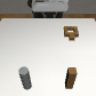

In [55]:
traj = get_traj(-1)
visualize_traj(traj)
